In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#afisam data setul wholesales
df = pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
# informatii despre coloane
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# scoatem matricea X
X = df.values

In [6]:
X

array([[    2,     3, 12669, ...,   214,  2674,  1338],
       [    2,     3,  7057, ...,  1762,  3293,  1776],
       [    2,     3,  6353, ...,  2405,  3516,  7844],
       ...,
       [    2,     3, 14531, ...,   437, 14841,  1867],
       [    1,     3, 10290, ...,  1038,   168,  2125],
       [    1,     3,  2787, ...,    65,   477,    52]], dtype=int64)

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [8]:
# creem o lista goala unde vom pastra scorurile noatre
scores = []
for k in range(2,11):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    y_pred = gmm.predict(X)
    scores.append(silhouette_score(X, y_pred))

In [9]:
scores

[0.27624713050297744,
 -0.07151337797678303,
 0.24144448046804123,
 0.04705505346466214,
 -0.030131711353444755,
 0.030887014553434657,
 0.01217516080652286,
 -0.007513311472286948,
 0.12305976470203539]

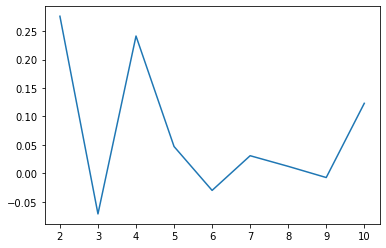

In [10]:
plt.plot(range(2,11), scores)

In [11]:
#afisam valorile cind este 2
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
y_pred = gmm.predict(X)

In [12]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [13]:
# afisam vectorii medii cu gmm
gmm.means_

array([[1.13470569e+00, 2.57106797e+00, 1.39766866e+04, 3.25379737e+03,
        3.96249353e+03, 3.56309308e+03, 9.01611389e+02, 1.11046379e+03],
       [1.73759818e+00, 2.48165084e+00, 7.63938220e+03, 1.14062401e+04,
        1.67525558e+04, 1.98818115e+03, 7.25011586e+03, 2.43926158e+03]])

In [14]:
# facem ca un tabel, analiza prescriptiva
cluster_table = pd.DataFrame(gmm.means_,columns = df.columns)

In [15]:
cluster_table

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.134706,2.571068,13976.686600,3253.797372,3962.493530,3563.093076,901.611389,1110.463794
1,1.737598,2.481651,7639.382201,11406.240075,16752.555803,1988.181154,7250.115859,2439.261577


In [16]:
cluster_table.std()

Channel                0.426309
Region                 0.063227
Fresh               4481.150915
Milk                5764.647518
Grocery             9043.939765
Frozen              1113.630900
Detergents_Paper    4489.070561
Delicassen           939.601923
dtype: float64

In [17]:
cluster_table[['Fresh','Milk','Grocery','Detergents_Paper']]

,Fresh,Milk,Grocery,Detergents_Paper
0,13976.686600,3253.797372,3962.493530,901.611389
1,7639.382201,11406.240075,16752.555803,7250.115859
